In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# NTK Beamforming


In [7]:
import numpy as np
import h5py
f = h5py.File('/opt/projects/generally_intelligent/standalone/llms/1_48_tofu_milk_doppler_10_100.mat','r')
# # data = f.get('data/variable1')
# # data = np.array(data) # For converting to a NumPy array

# import numpy as np
# import scipy.io
# mat = scipy.io.loadmat('1_48_tofu_purple_straw_single_angle.mat')
raw_rf_data = np.array(f[f['RcvData'][0,0]]).transpose((2,1,0))

600

In [11]:
aperture_permutation = [22,21,20,40,23,41,45,42,44,43,46,17,16,47,12,19,18,13,14,15,48,49,53,50,52,51,8,54,55,10,11,4,5,6,7,9,3,2,1,0,39,38,37,36,32,33,34,35]
len(aperture_permutation)

48

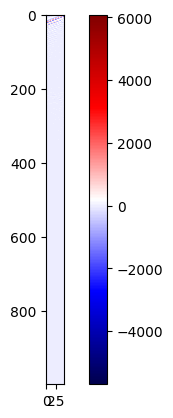

In [172]:
import matplotlib.pyplot as plt
plt.imshow(raw_rf_data[2048*0:2048*0+1000,aperture_permutation,0], cmap="seismic")
plt.colorbar()
plt.show()

In [176]:
from imaging.demodulate import demodulate_rf_to_iq

transducer_frequency = 2.5e6 # default verasonics is 2.5MHz
freq_sampling = 4 * transducer_frequency
iq_signals, freq_carrier = demodulate_rf_to_iq(
    raw_rf_data[2048*0+4200:2048*0+5200,aperture_permutation,0], freq_sampling, freq_carrier=transducer_frequency
)

freq_carrier

2500000.0

In [177]:
N = 220
Nz = 200
dx0 = 2.95e-4

nelements = 48

# Generate 1D arrays for x and z
x = np.linspace(-(N // 2) * dx0, (N // 2) * dx0, N)
z = np.linspace(0, Nz * dx0, Nz)

# Create 2D meshgrid for x and z
X, Z = np.meshgrid(x, z)

N, Nz, dx0

(220, 200, 0.000295)

In [178]:
from imaging.beamform import beamform_delay_and_sum

beamformed_signal = beamform_delay_and_sum(
    iq_signals,
    X,
    Z,
    freq_sampling,
    freq_carrier,
    pitch=dx0,
    tx_delays=np.zeros(nelements),
)

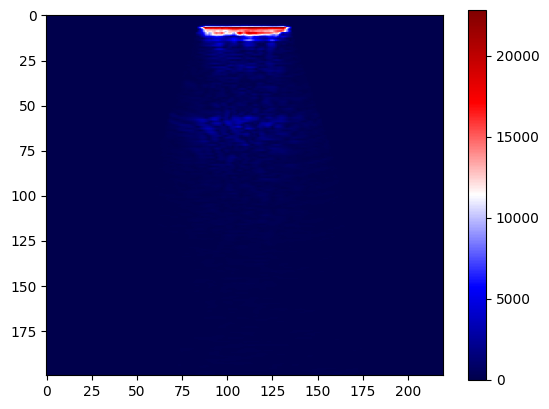

In [179]:
plt.imshow(np.abs(beamformed_signal), cmap="seismic")
plt.colorbar()
plt.show()

In [180]:
all_beamformed_signals = []
for i in range(600):
    iq_signals, freq_carrier = demodulate_rf_to_iq(
        raw_rf_data[2048*0+4200:2048*0+5200,aperture_permutation,i], freq_sampling, freq_carrier=transducer_frequency
    )
    beamformed_signal = beamform_delay_and_sum(
        iq_signals,
        X,
        Z,
        freq_sampling,
        freq_carrier,
        pitch=dx0,
        tx_delays=np.zeros(nelements),
    )
    all_beamformed_signals.append(beamformed_signal)
    if i % 50 == 0:
        print(f"done with {i}")
all_beamformed_signals = np.array(all_beamformed_signals)

all_beamformed_signals.shape

done with 0
done with 50
done with 100
done with 150
done with 200
done with 250
done with 300
done with 350
done with 400
done with 450
done with 500
done with 550


(600, 200, 220)

## Better Doppler Data

In [186]:
# gdown 1oeQt9YSlFsACUqtyK99VkUpfTz2v3ldh
# import numpy as np
# import h5py
# f = h5py.File('/opt/projects/generally_intelligent/standalone/llms/1_48_tofu_milk_doppler_10_100.mat','r')
# # # data = f.get('data/variable1')
# # # data = np.array(data) # For converting to a NumPy array

import numpy as np
import scipy.io
mat = scipy.io.loadmat('08_17_doppler_10mms_300us.mat')
mat.keys()

/opt/venv/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


dict_keys(['__header__', '__version__', '__globals__', 'AxesUnit', 'BG', 'Control', 'DisplayData', 'DwHeight', 'DwWidth', 'Event', 'ID', 'IData', 'ImgData', 'ImgDataP', 'LEsys', 'LogData', 'Media', 'MinMaxVal', 'P', 'PB', 'PData', 'Presence', 'Process', 'QData', 'RcvData', 'RcvProfile', 'Receive', 'Recon', 'ReconInfo', 'RequiredStructs', 'Resource', 'Result', 'SG', 'ScrnSize', 'SeqControl', 'TGC', 'TPC', 'TW', 'TX', 'TXEventCheckh', 'TX_Limits', 'Trans', 'UI', 'UIPos', 'UTA', 'UTAtype', 'VDAS', 'VDASupdates', 'VSX_Control', 'action', 'ans', 'apernum', 'apod', 'arbwaveTxLicenseIsValid', 'autoScriptTest', 'axisname', 'computeHVMux', 'None', 'displayWindowTitle', 'errMsg', 'extendedTxLicenseIsValid', 'fid', 'frameRateFactor', 'freeze', 'freqRngRqd', 'gpuDirectLicenseIsValid', 'gpuToolkitLicenseIsValid', 'hardwareLicenseIsValid', 'hv2GUIprofile', 'hvDefault', 'hvMax', 'i', 'initialized', 'isHwInFaultState', 'isUsingOldVSXGUIcreation', 'j', 'k', 'maxADRate', 'maxAcqLength', 'minADRate', 'mi

In [191]:
raw_doppler_data = mat['RcvData'][0,0]

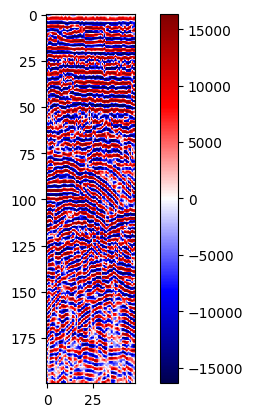

In [328]:
import matplotlib.pyplot as plt
plt.imshow(raw_doppler_data[:200,aperture_permutation,10], cmap="seismic")
plt.colorbar()
plt.show()

In [200]:
all_beamformed_doppler_signals = []
for i in range(8000):
    iq_signals, freq_carrier = demodulate_rf_to_iq(
        raw_doppler_data[:800,aperture_permutation,i], freq_sampling, freq_carrier=transducer_frequency
    )
    beamformed_signal = beamform_delay_and_sum(
        iq_signals,
        X,
        Z,
        freq_sampling,
        freq_carrier,
        pitch=dx0,
        tx_delays=np.zeros(nelements),
    )
    all_beamformed_doppler_signals.append(beamformed_signal)
    if i % 500 == 0:
        print(f"done with {i}")
all_beamformed_doppler_signals = np.array(all_beamformed_doppler_signals)

all_beamformed_doppler_signals.shape

done with 0
done with 500
done with 1000
done with 1500
done with 2000
done with 2500
done with 3000
done with 3500
done with 4000
done with 4500
done with 5000
done with 5500
done with 6000
done with 6500
done with 7000
done with 7500


(8000, 200, 220)

In [204]:
np.save("/mnt/shared/doppler.npy", all_beamformed_doppler_signals)

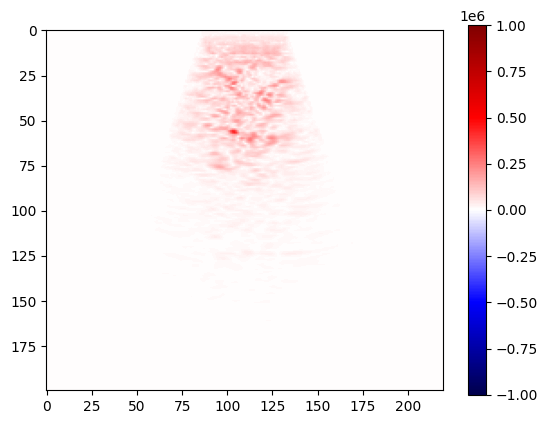

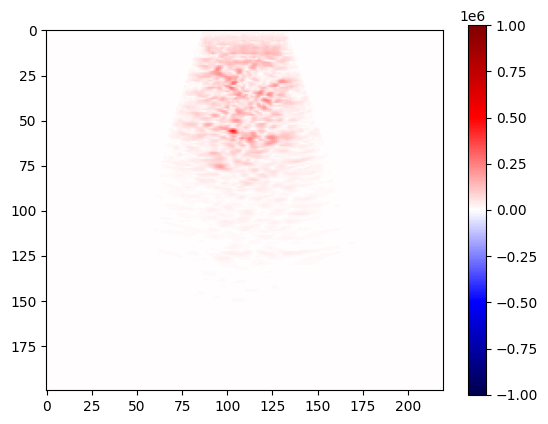

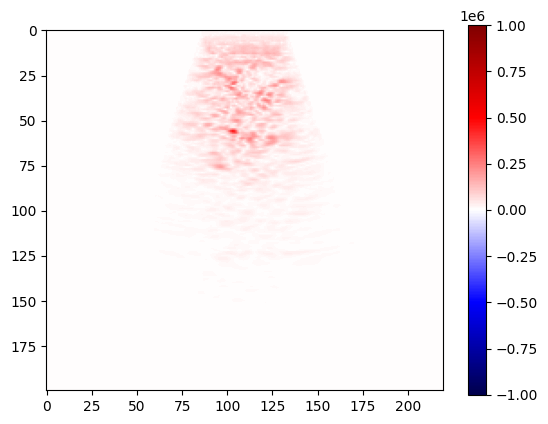

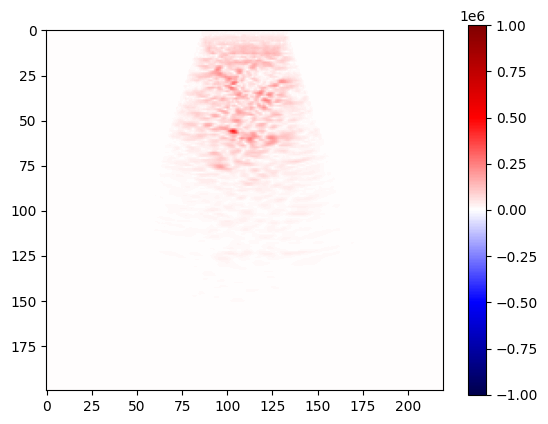

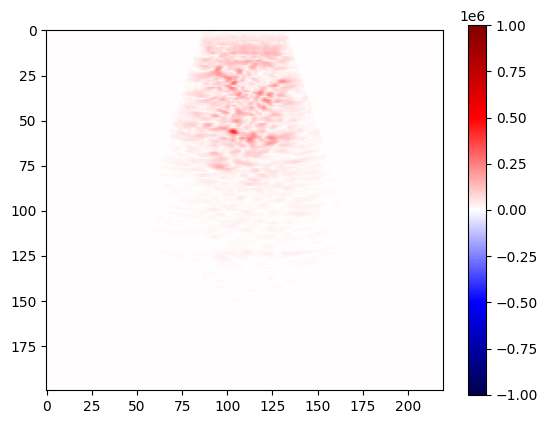

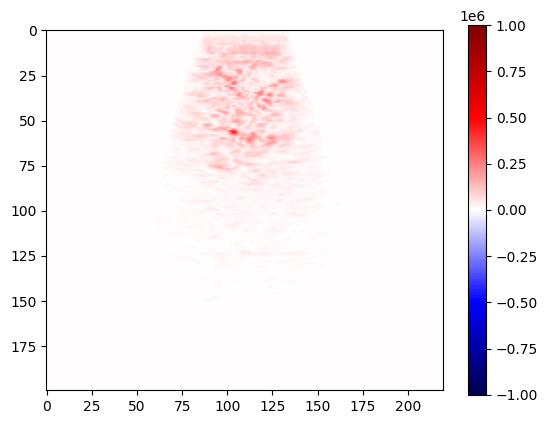

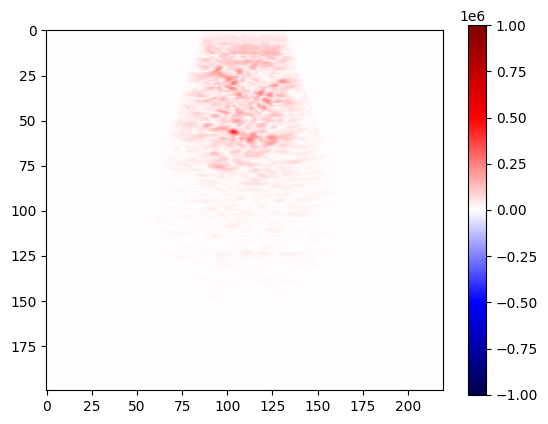

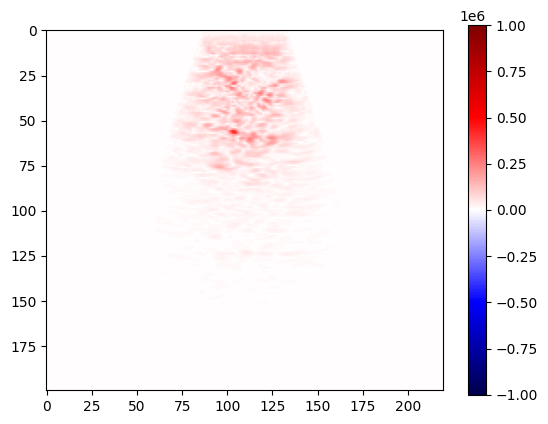

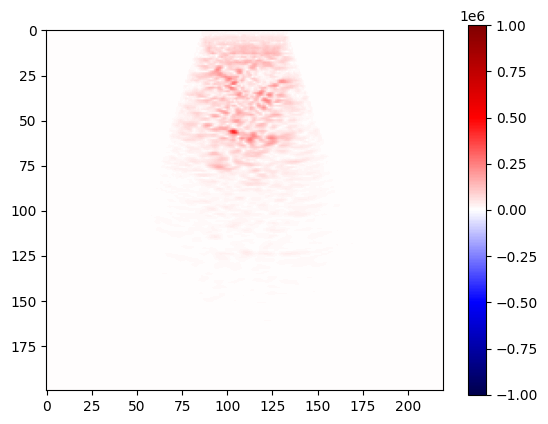

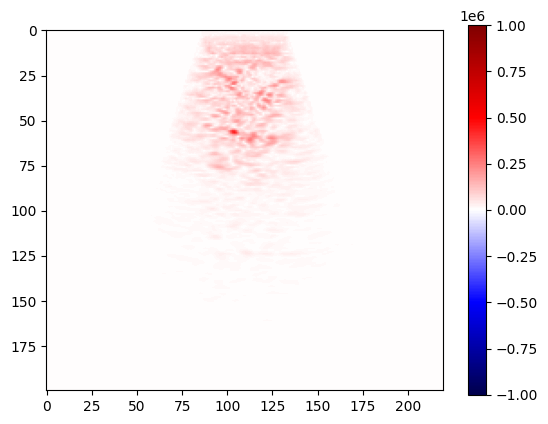

In [209]:
for i in range(10):
    plt.imshow((np.abs(all_beamformed_doppler_signals[800*i])), cmap="seismic", vmin=-1e6, vmax=1e6)
    plt.colorbar()
    plt.show()

In [331]:
def power_doppler(beamform_data, start_frame, end_frame, frame_freq):
    # start and end frames are indices. frame rate is around 3300 Hz
    fft_data = np.fft.fft(beamform_data[start_frame:end_frame], axis=0)
    freqs = np.fft.fftfreq(end_frame - start_frame, 1/frame_freq)
    high_pass = fft_data[(abs(freqs)> 2 * transducer_frequency * 4e-3 / 1540)] # 1540 m/s is speed of sound, 4e-3 m/s is tissue slow movements
    return np.sum(np.abs(high_pass)**2,axis=0)

power = power_doppler(all_beamformed_doppler_signals, 0, 660, frame_freq=3300)
power.shape

(200, 220)

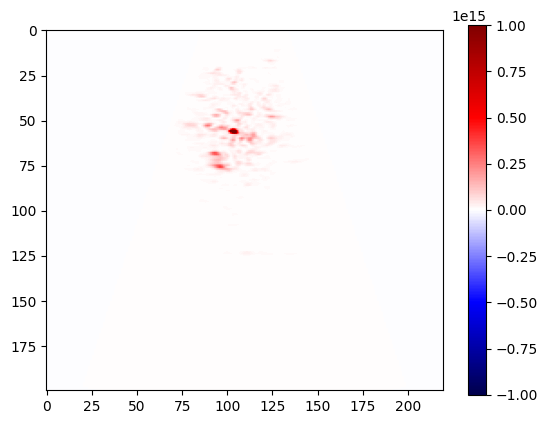

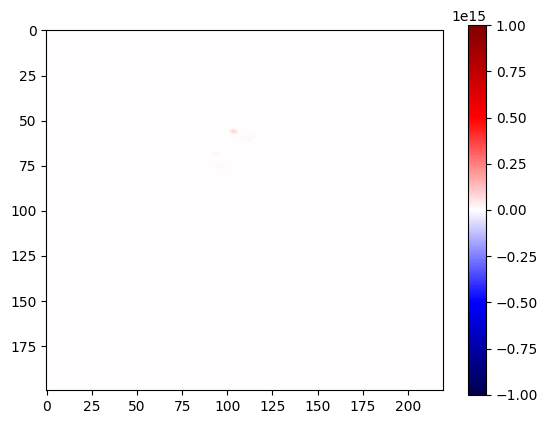

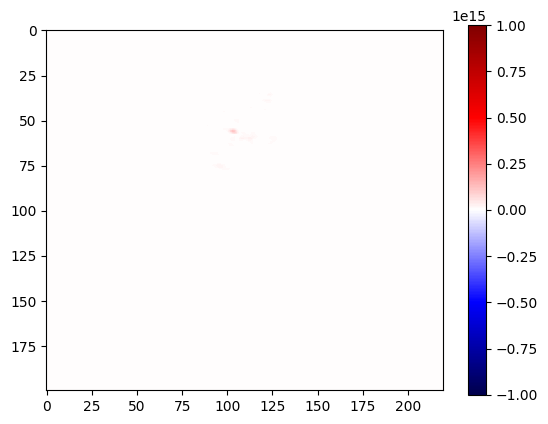

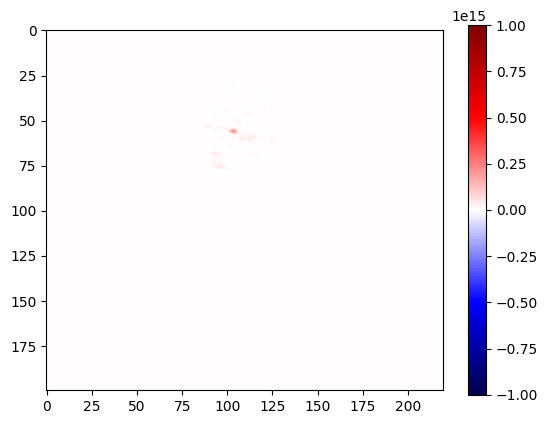

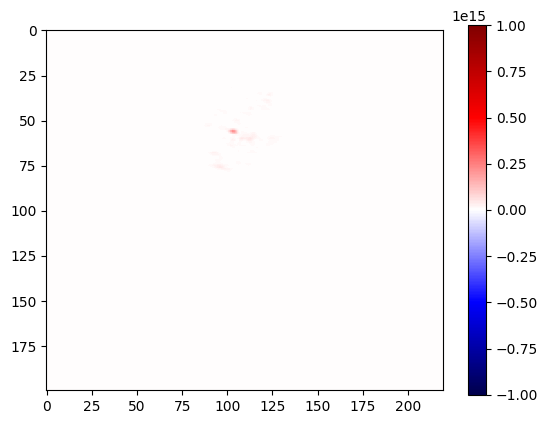

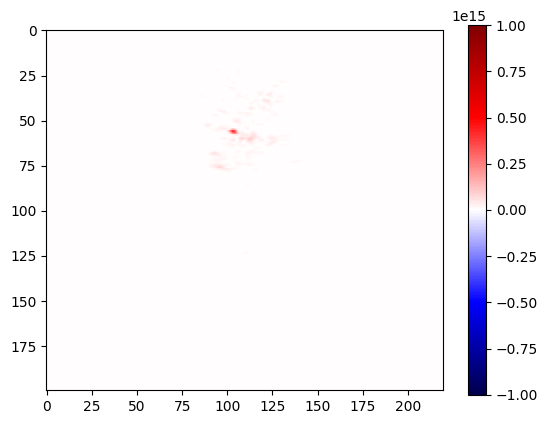

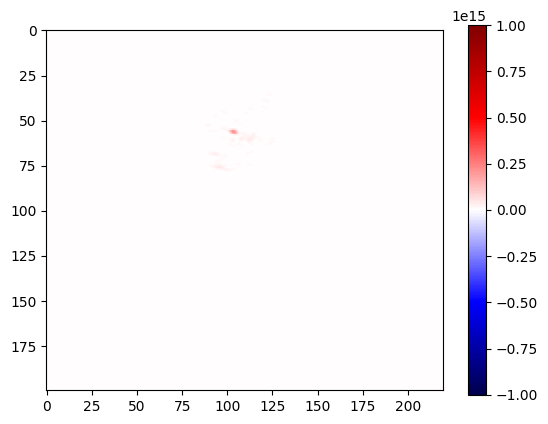

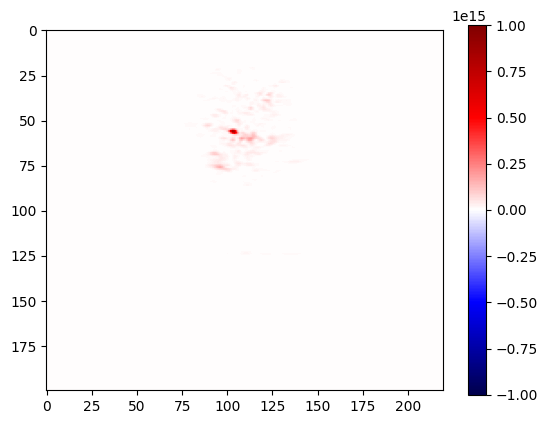

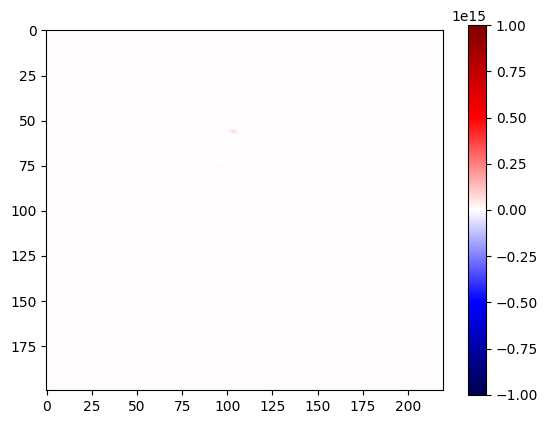

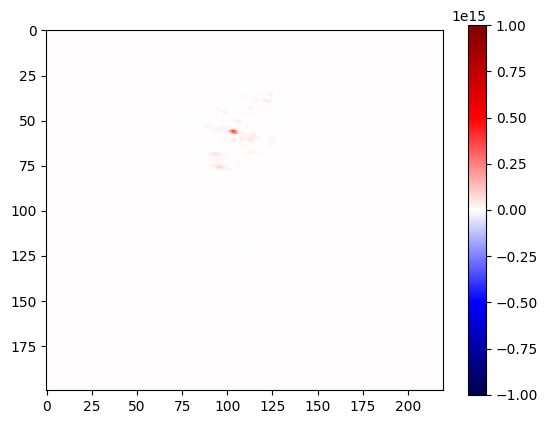

In [332]:
for t in range(10):
    power = power_doppler(all_beamformed_doppler_signals, 660*t, 660*(t+1), frame_freq=3300)
    plt.imshow(power[:,:], cmap="seismic", vmin=-1e15, vmax=1e15)
    plt.colorbar()
    plt.show()

In [335]:
import numpy as np
from scipy import signal

def butterworth_high_pass_filter_3d(data, frame_freq, order=4):
    b, a = signal.butter(order, 2 * transducer_frequency * 4e-3 / 1540, fs=frame_freq, btype='high', analog=False)
    
    # Step 2: Apply the filter along axis 0 using filtfilt (zero-phase filtering)
    filtered_data = signal.filtfilt(b, a, data, axis=0)
    
    return filtered_data

def power_doppler_2(data, start_frame, end_frame, frame_freq):
    # start and end frames are indfices. frame rate is around 3300 Hz
    raw_frames = data[start_frame:end_frame]
    filtered_frames = butterworth_high_pass_filter_3d(raw_frames, frame_freq=frame_freq)
    fft_data = np.fft.fft(filtered_frames, axis=0)
    return np.sum(np.abs(fft_data)**2,axis=0)

power = power_doppler_2(all_beamformed_doppler_signals, 0, 660, frame_freq=3300)
power.shape

(200, 220)

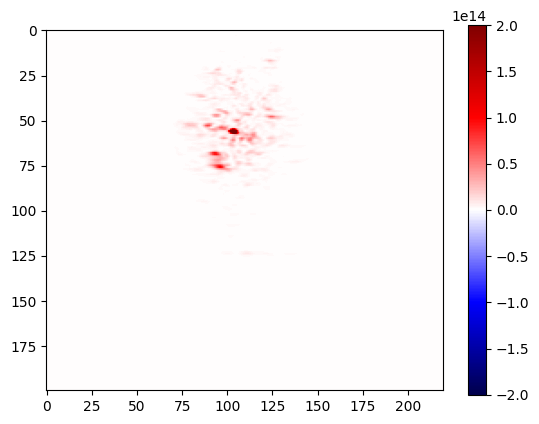

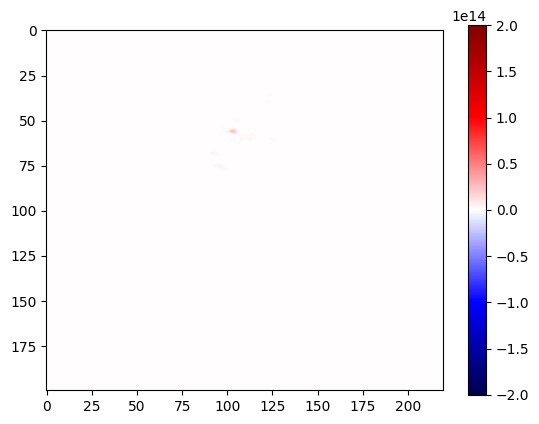

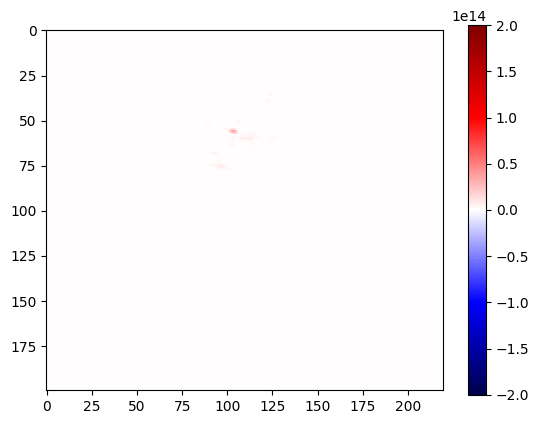

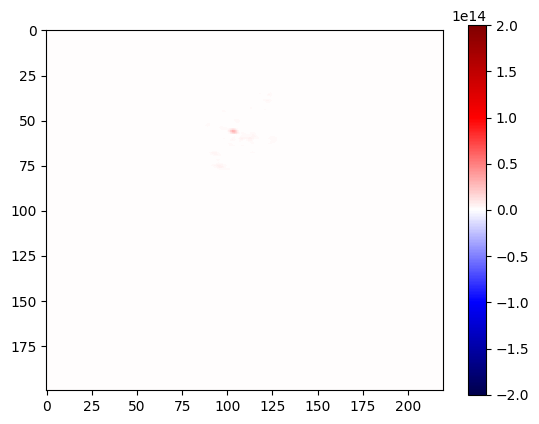

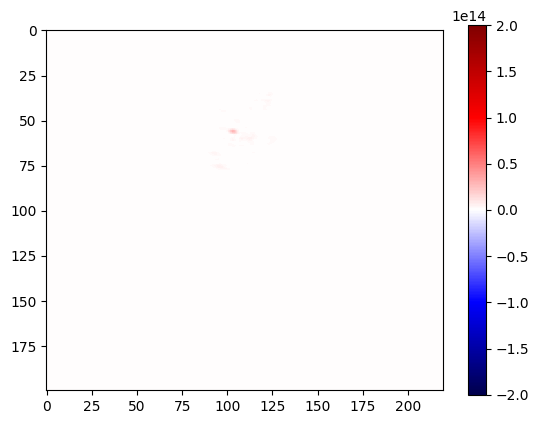

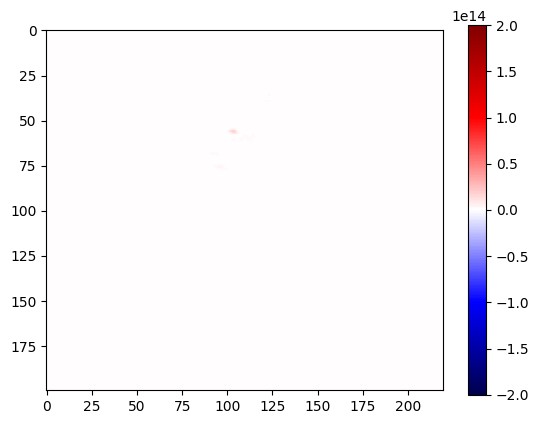

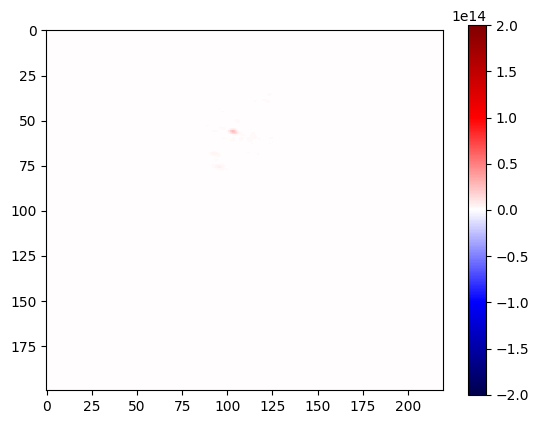

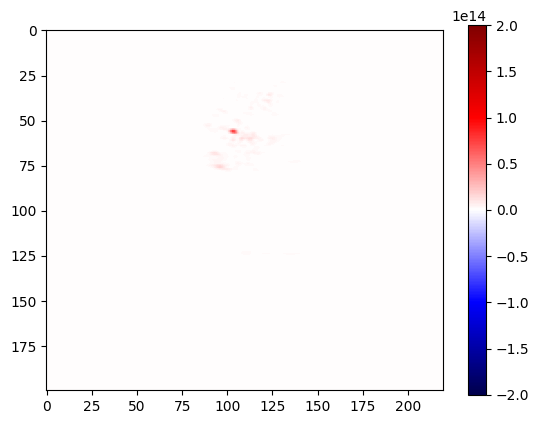

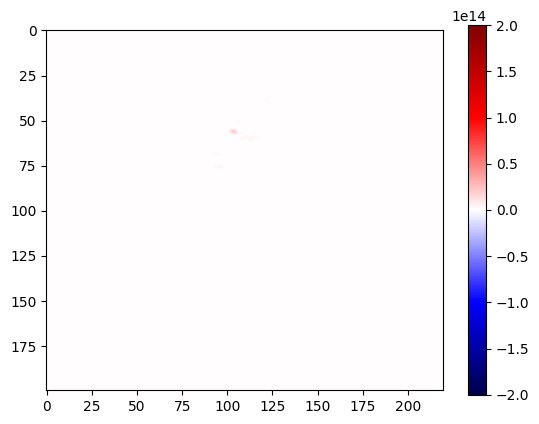

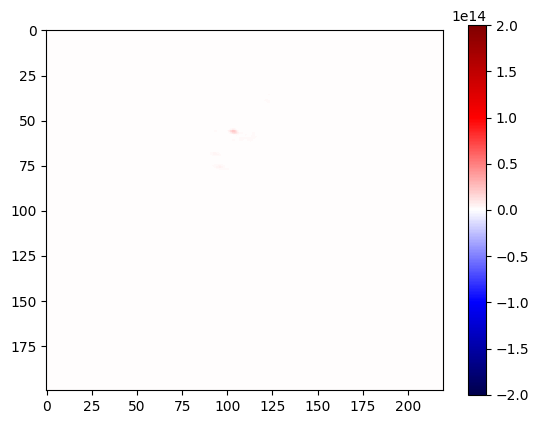

In [337]:
for t in range(10):
    power = power_doppler_2(all_beamformed_doppler_signals, 660*t, 660*(t+1), frame_freq=3300)
    plt.imshow(power[:,:], cmap="seismic", vmin=-2e14, vmax=2e14)
    plt.colorbar()
    plt.show()

## Even better Doppler data

In [261]:
import numpy as np
import h5py
f = h5py.File('/opt/projects/generally_intelligent/standalone/llms/08_17_long_doppler_10mms_300us.mat','r')
# # data = f.get('data/variable1')
# # data = np.array(data) # For converting to a NumPy array
f[f['RcvData'][0,0]].shape

(26000, 64, 1024)

In [263]:
raw_doppler_data_2 = np.array(f[f['RcvData'][0,0]]).transpose((2,1,0))

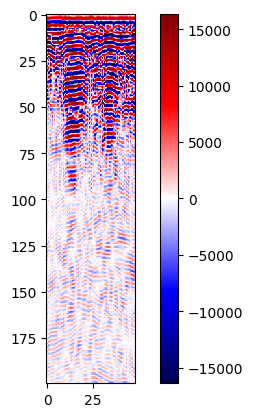

In [333]:
import matplotlib.pyplot as plt
plt.imshow(raw_doppler_data_2[:200,aperture_permutation,10], cmap="seismic")
plt.colorbar()
plt.show()

In [317]:
all_beamformed_doppler_signals_2 = []
for i in range(0, 26000, 1000):
    iq_signals, freq_carrier = demodulate_rf_to_iq(
        raw_doppler_data_2[:,aperture_permutation,i:i+1000], freq_sampling, freq_carrier=transducer_frequency
    )
    beamformed_signal = beamform_delay_and_sum(
        iq_signals,
        X,
        Z,
        freq_sampling,
        freq_carrier,
        pitch=dx0,
        tx_delays=np.zeros(nelements),
    )
    all_beamformed_doppler_signals_2.append(beamformed_signal.transpose((2,0,1)))
    print(f"done with {i + 1000}")
all_beamformed_doppler_signals_2 = np.concatenate(all_beamformed_doppler_signals_2)

all_beamformed_doppler_signals_2.shape

done with 1000
done with 2000
done with 3000
done with 4000
done with 5000
done with 6000
done with 7000
done with 8000
done with 9000
done with 10000
done with 11000
done with 12000
done with 13000
done with 14000
done with 15000
done with 16000
done with 17000
done with 18000
done with 19000
done with 20000
done with 21000
done with 22000
done with 23000
done with 24000
done with 25000
done with 26000


(26000, 200, 220)

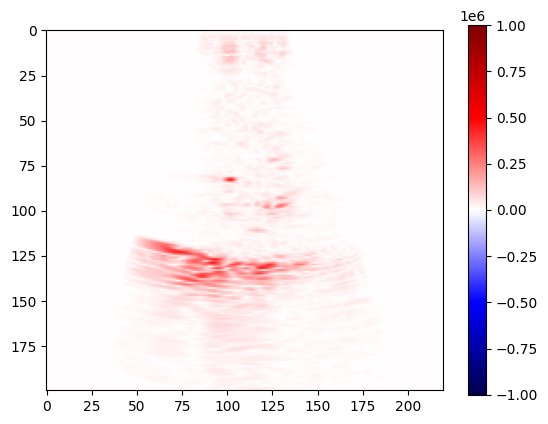

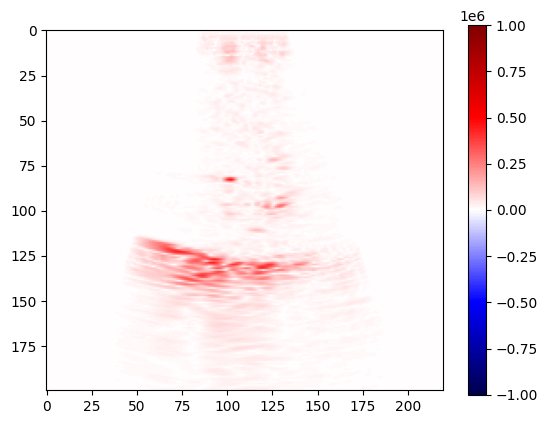

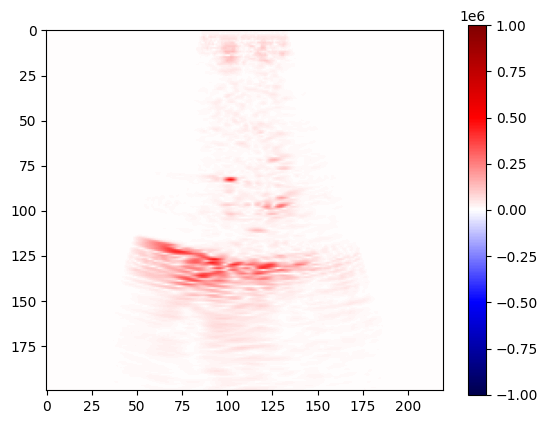

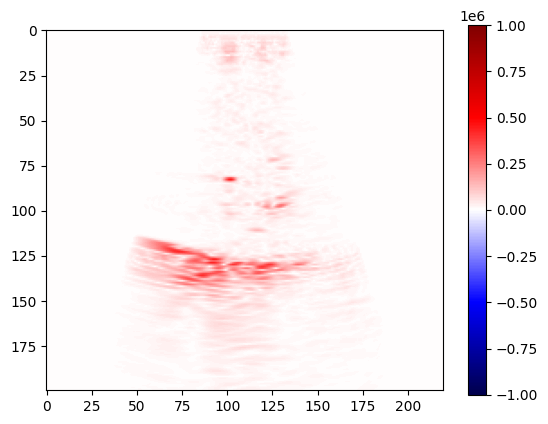

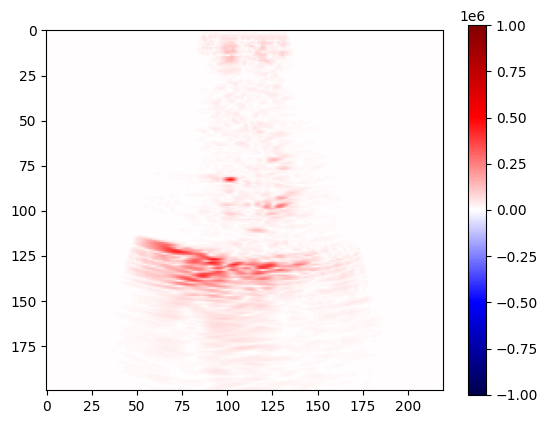

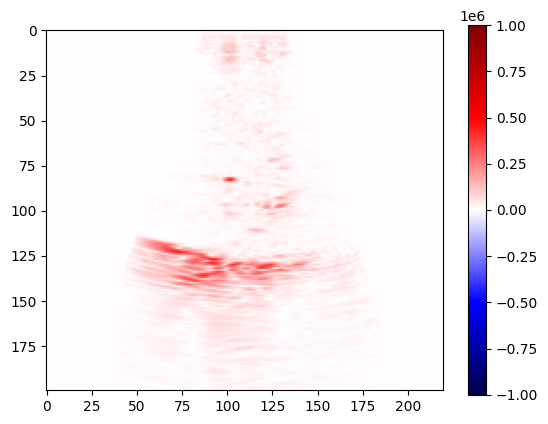

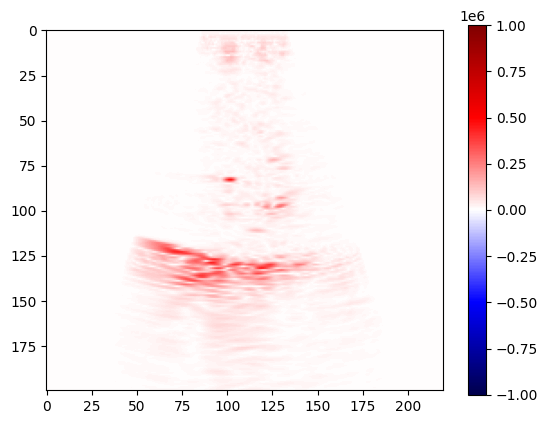

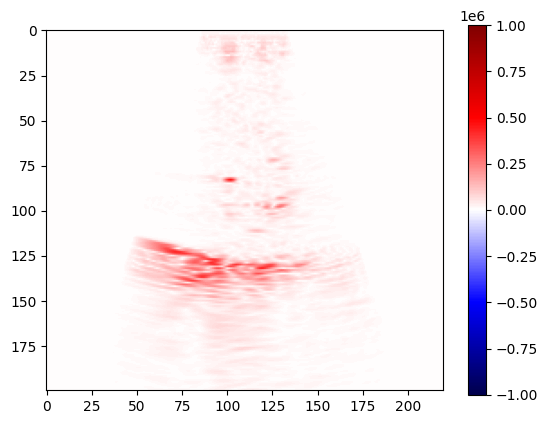

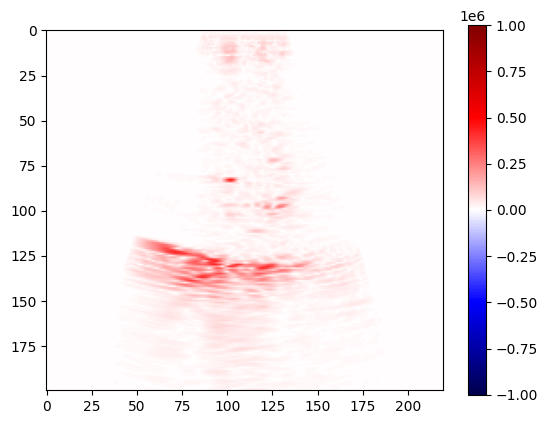

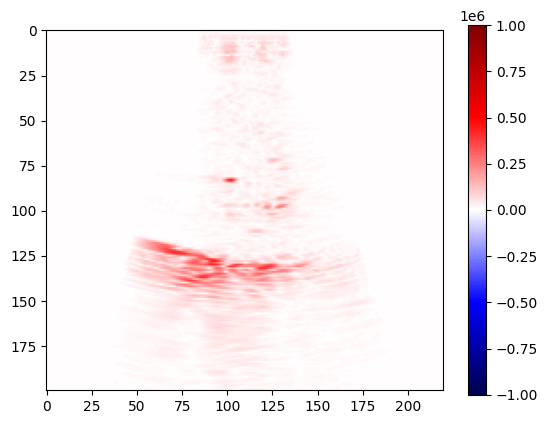

In [319]:
for i in range(10):
    plt.imshow((np.abs(all_beamformed_doppler_signals_2[660*i])), cmap="seismic", vmin=-1e6, vmax=1e6)
    plt.colorbar()
    plt.show()

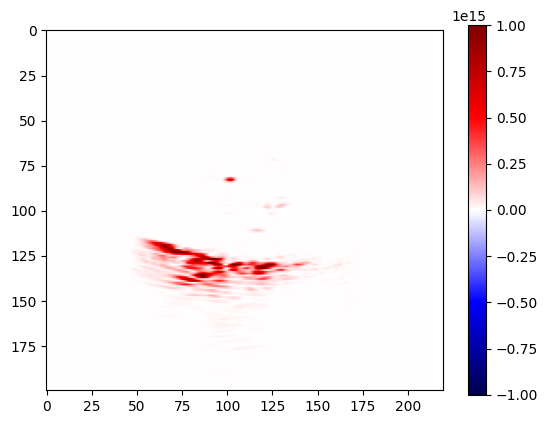

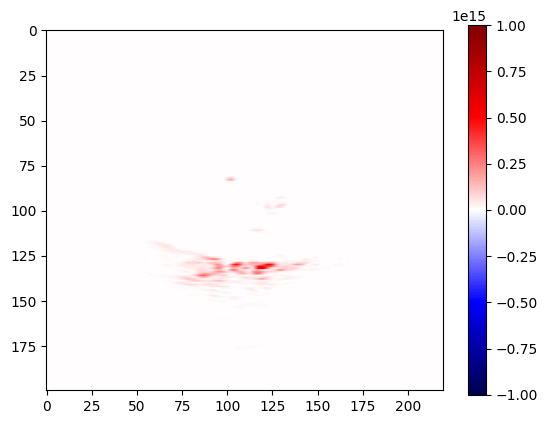

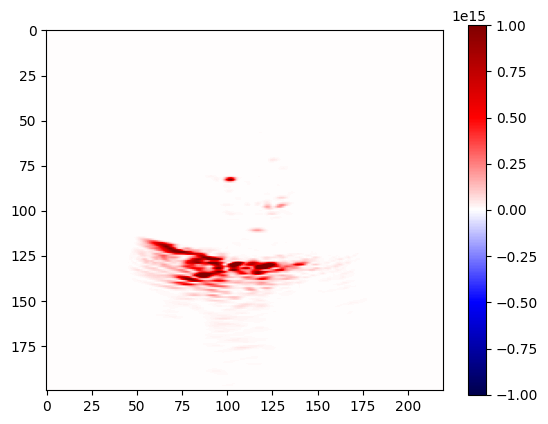

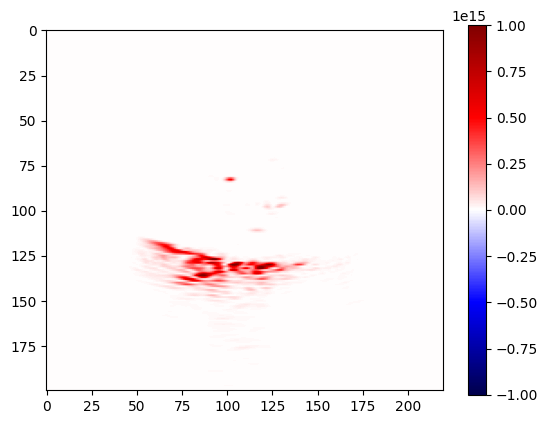

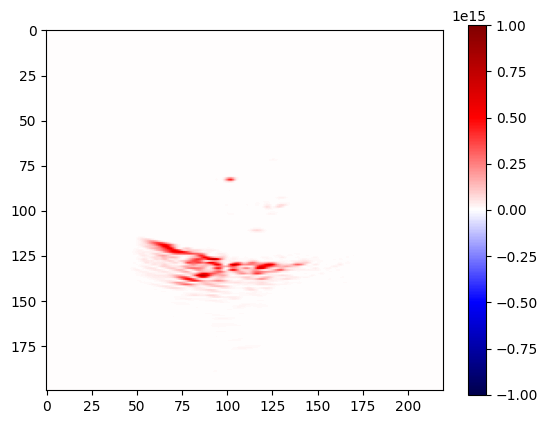

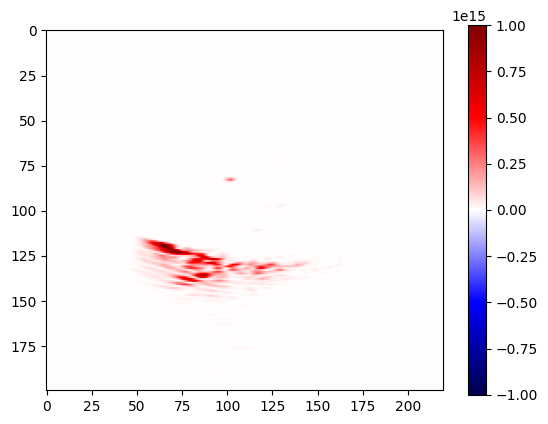

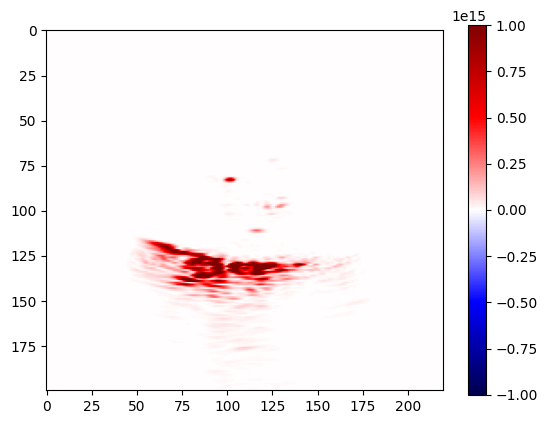

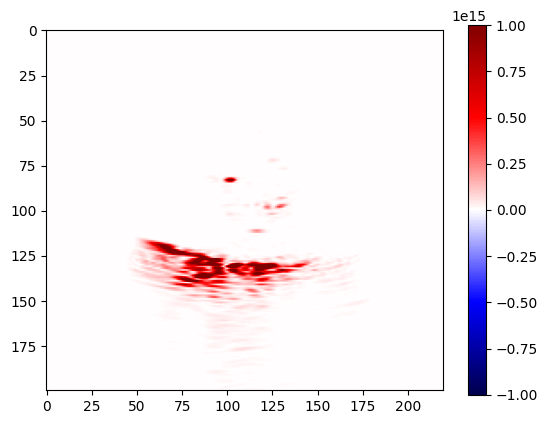

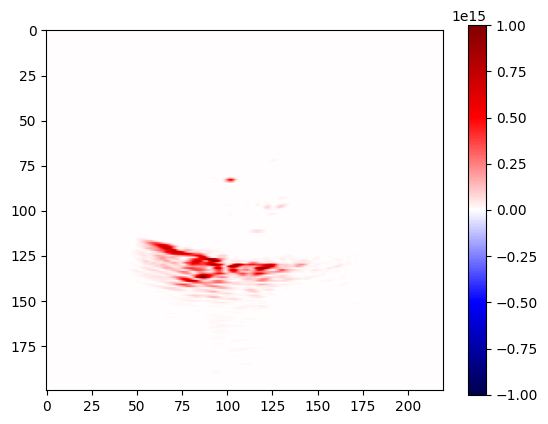

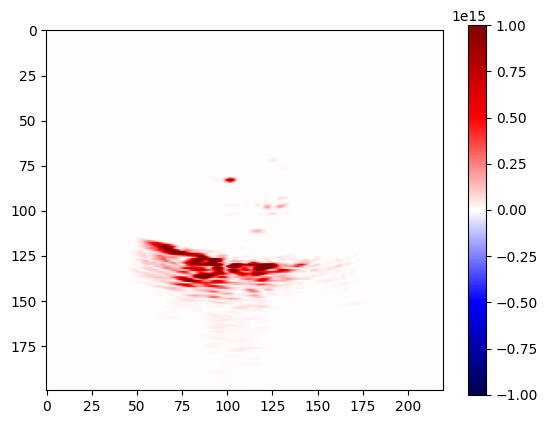

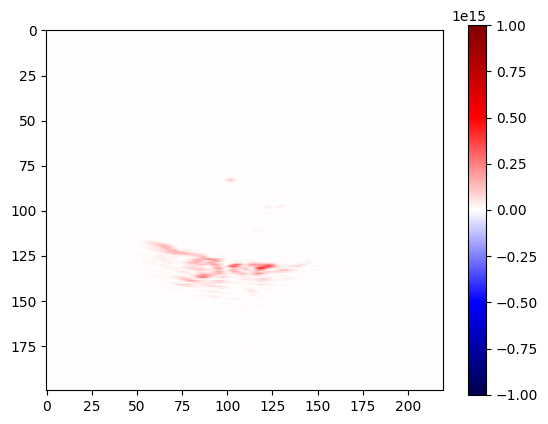

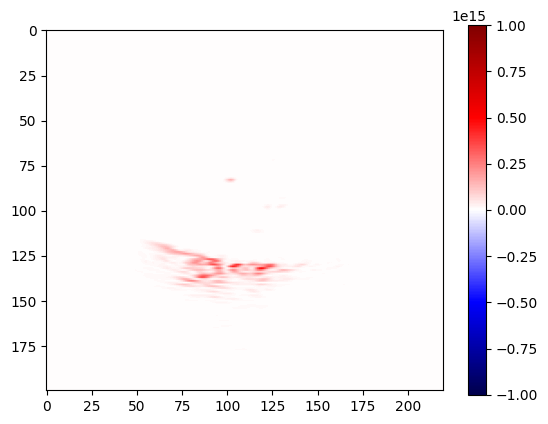

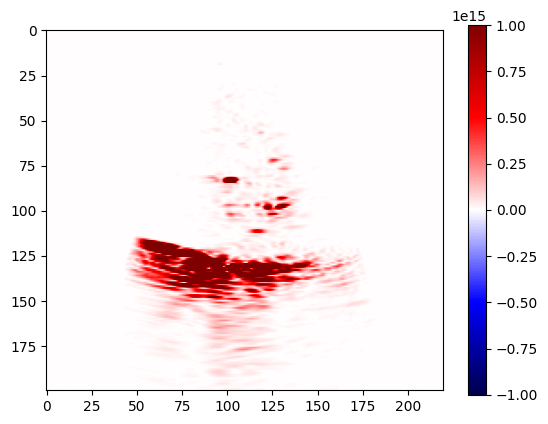

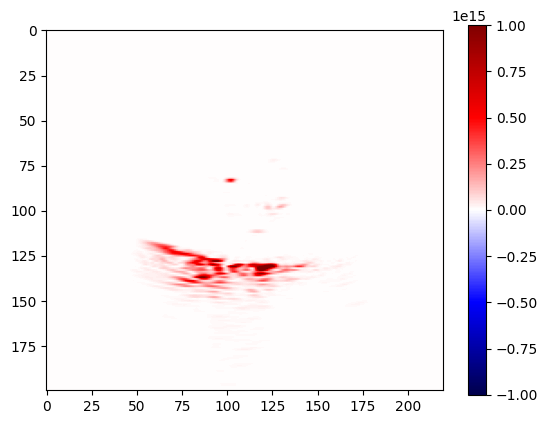

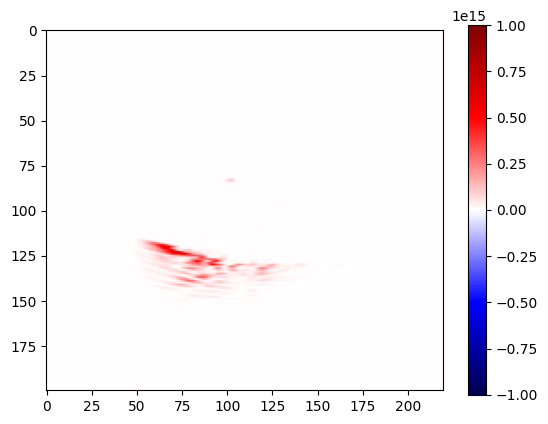

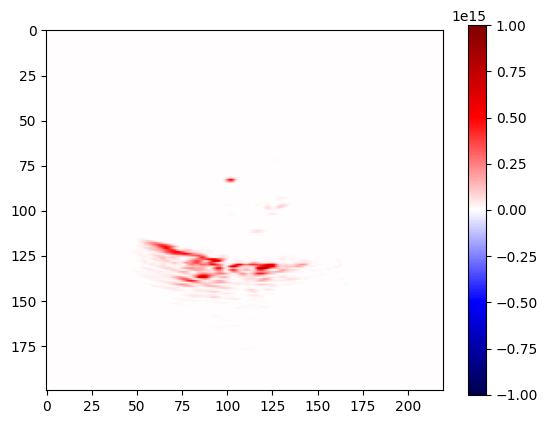

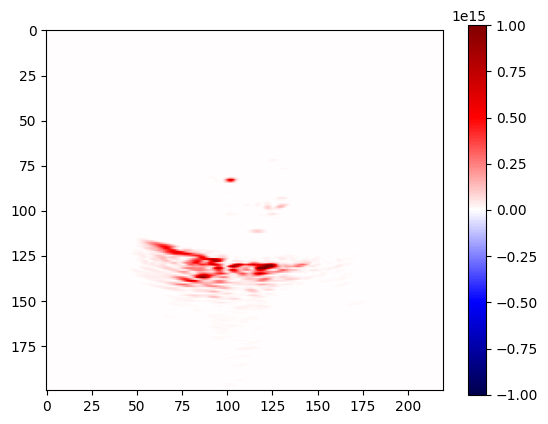

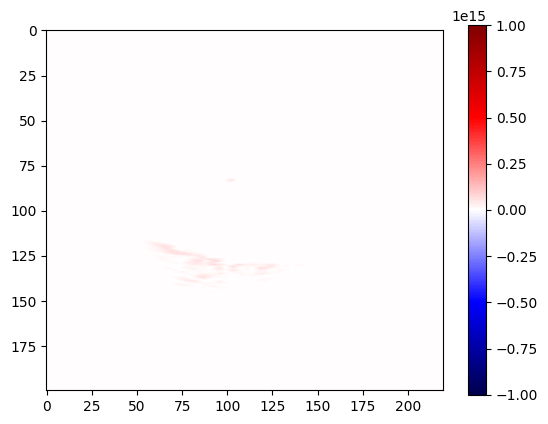

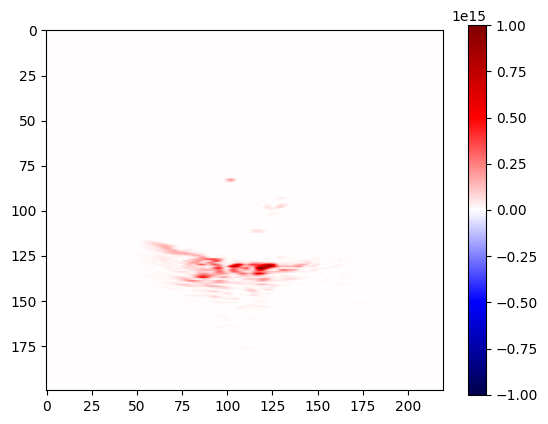

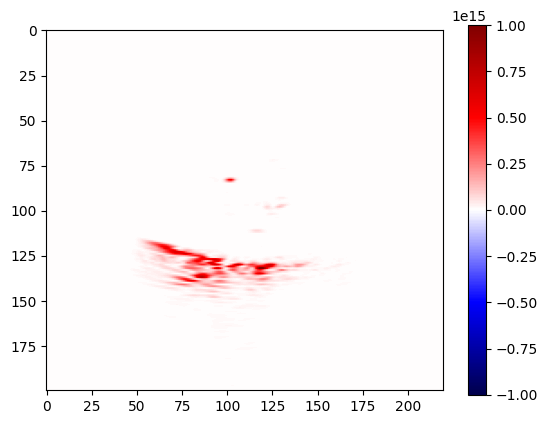

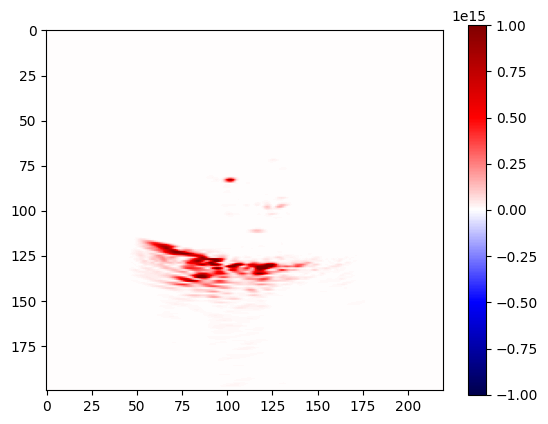

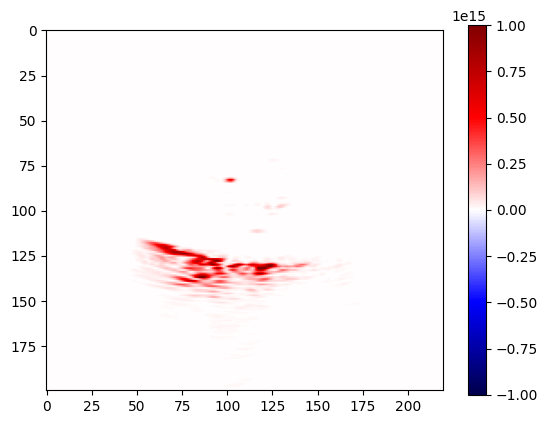

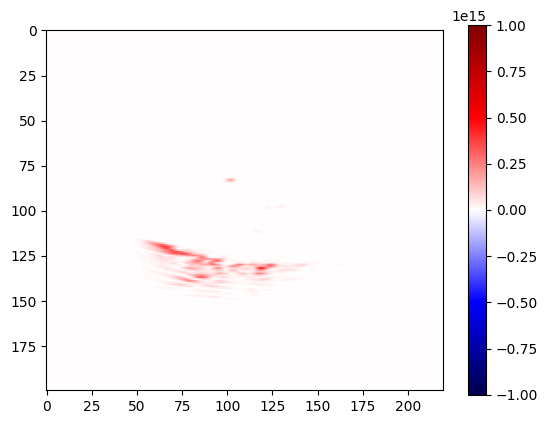

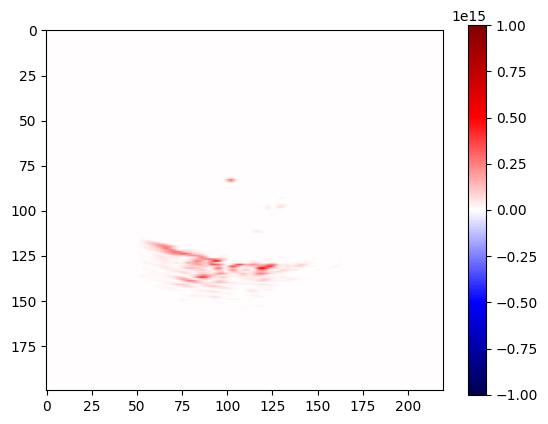

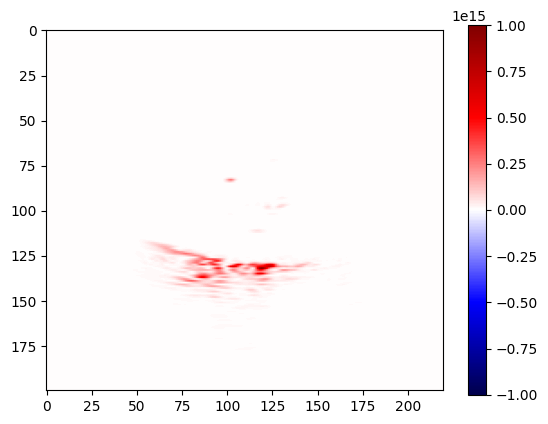

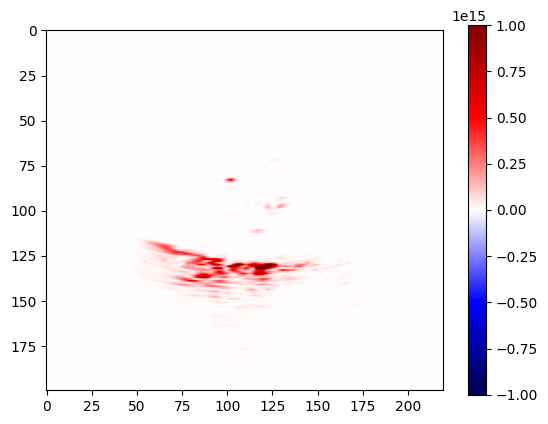

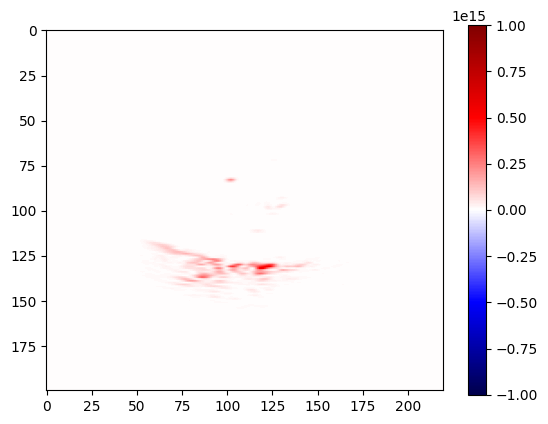

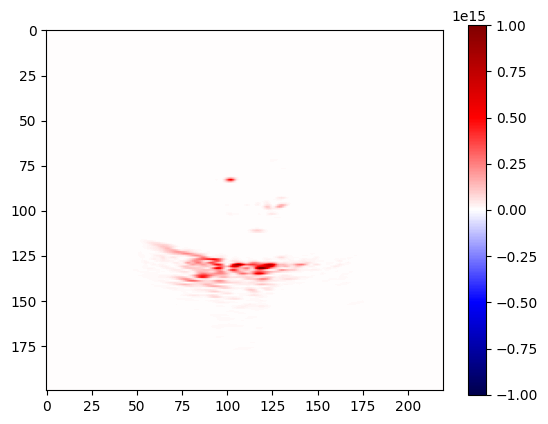

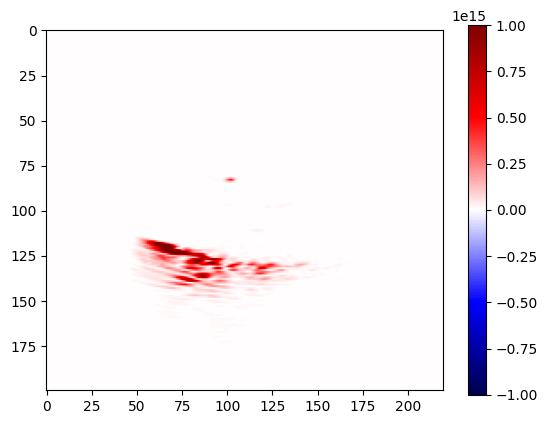

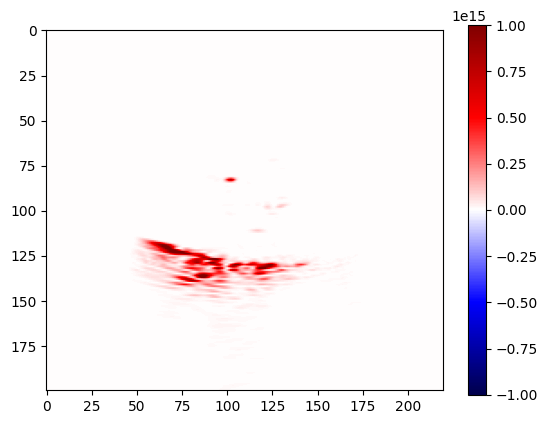

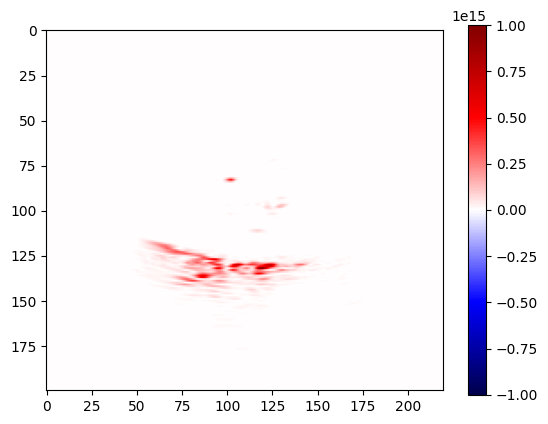

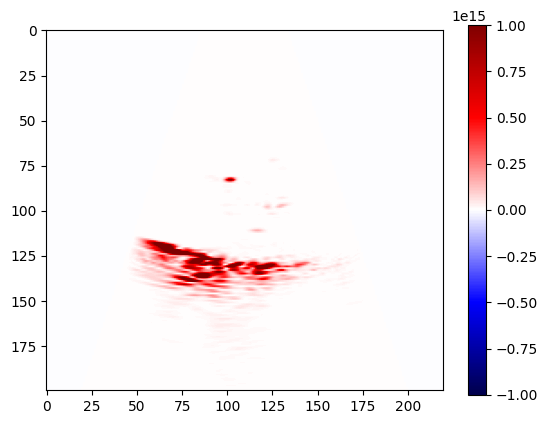

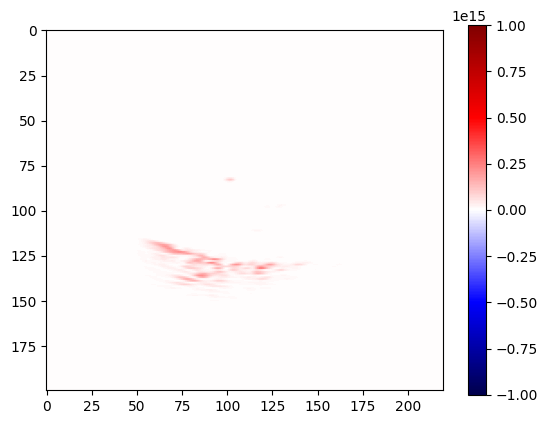

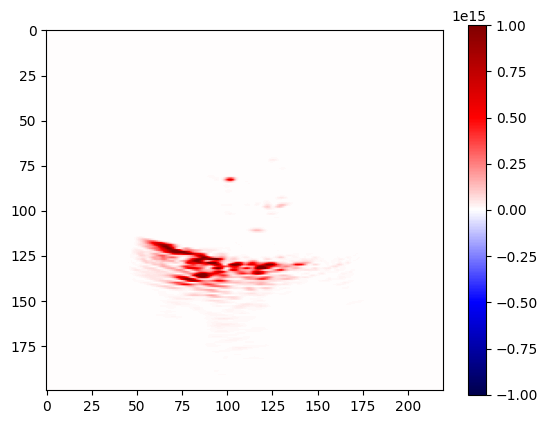

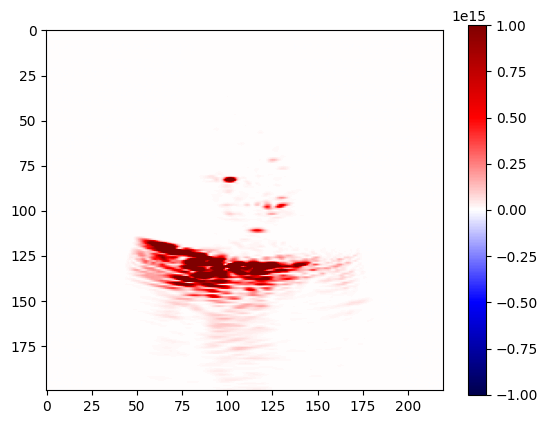

In [338]:
for t in range(35):
    power = power_doppler(all_beamformed_doppler_signals_2, 660*t, 660*(t+1), 3300)
    plt.imshow(power[:,:], cmap="seismic", vmin=-1e15, vmax=1e15)
    plt.colorbar()
    plt.show()

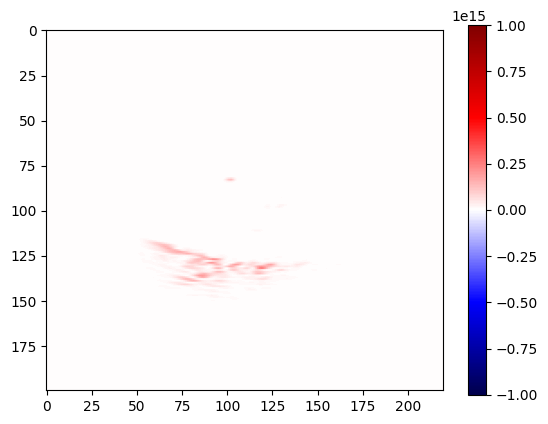

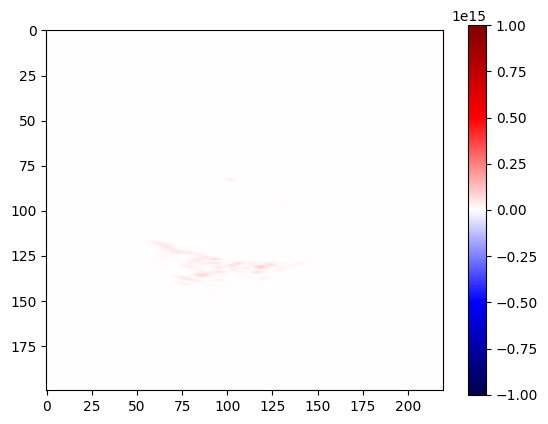

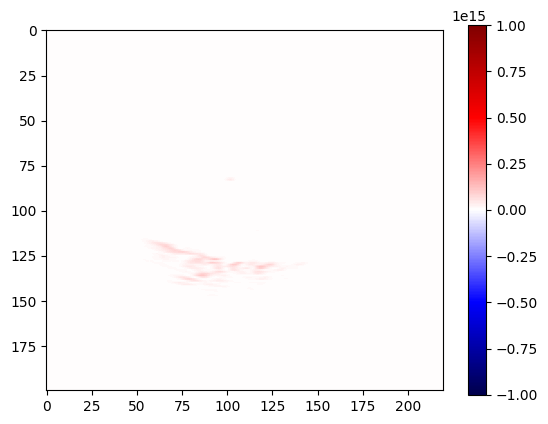

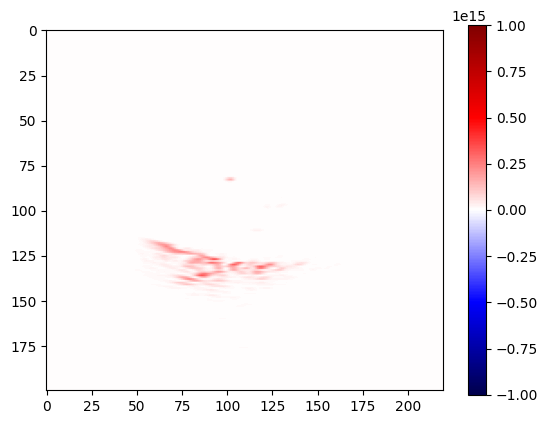

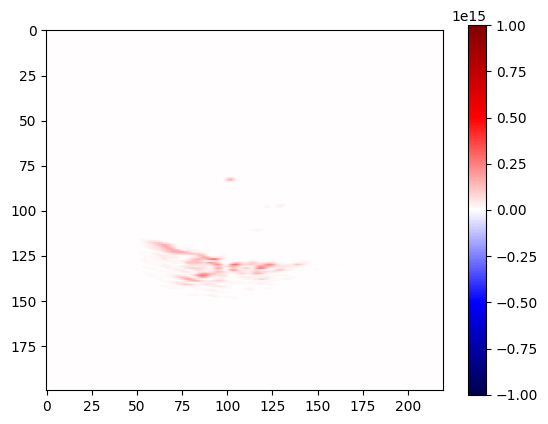

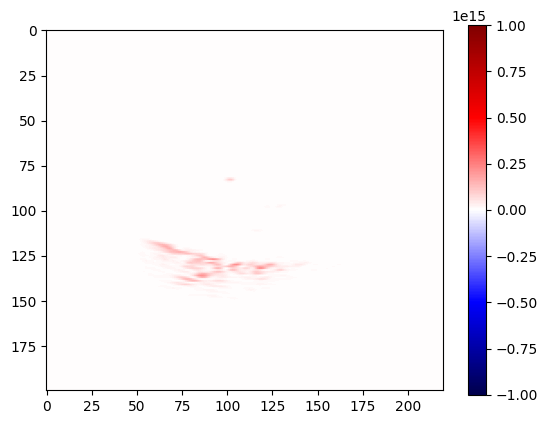

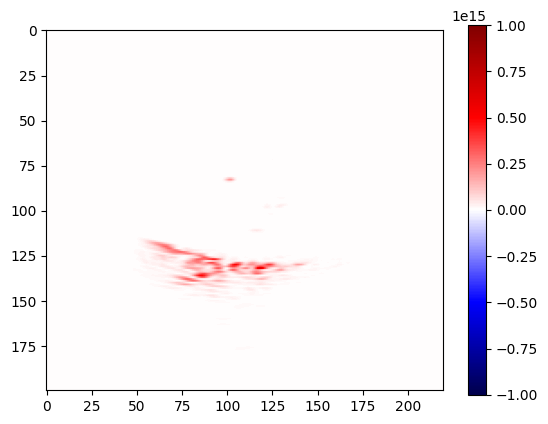

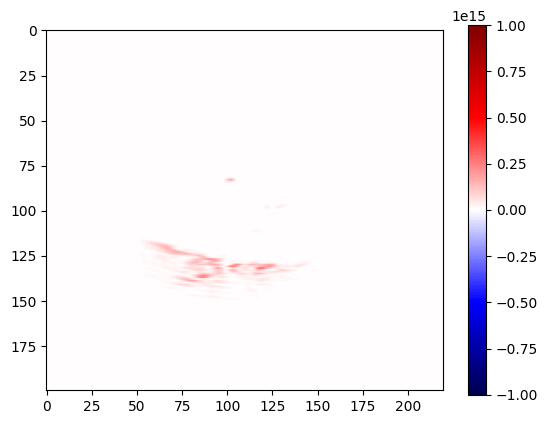

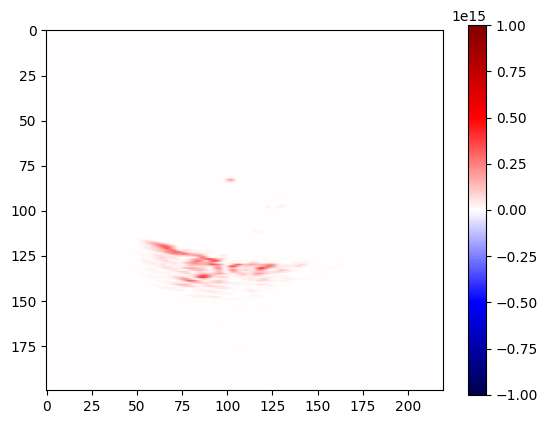

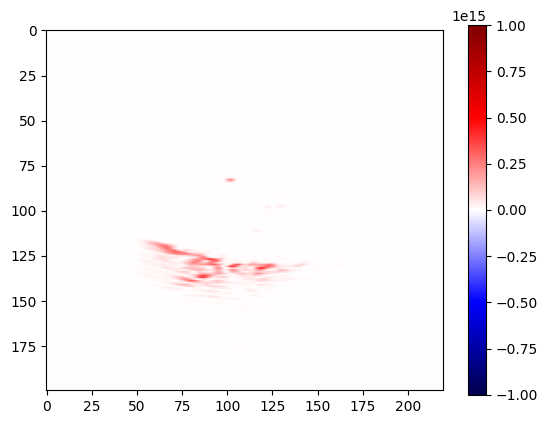

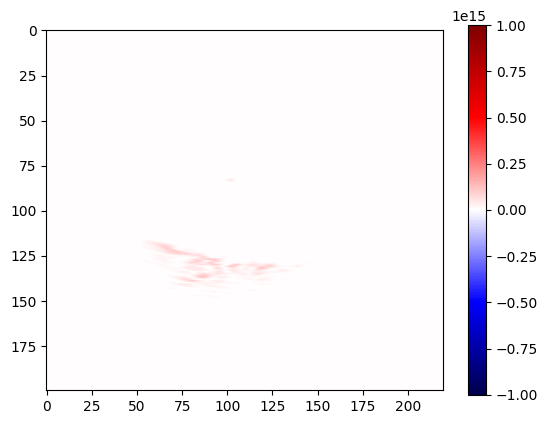

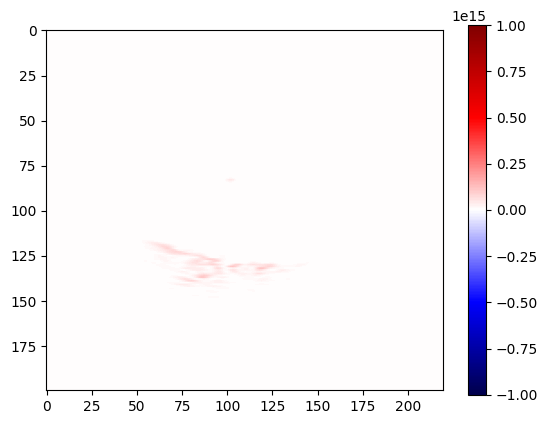

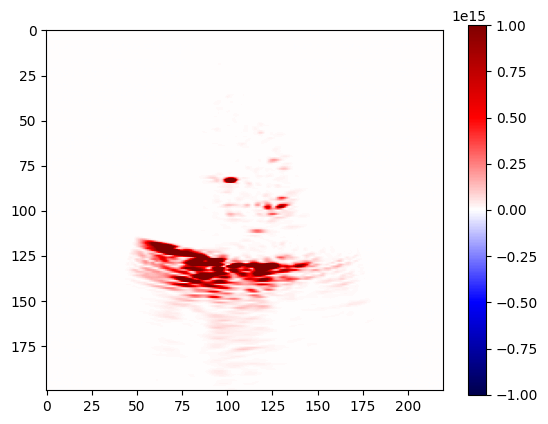

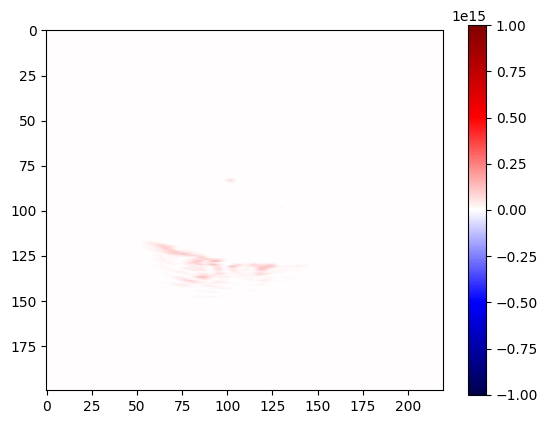

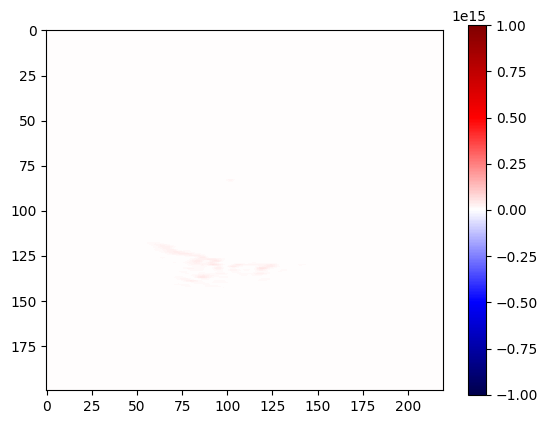

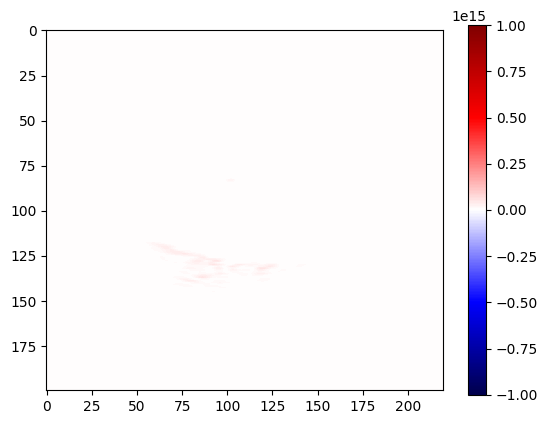

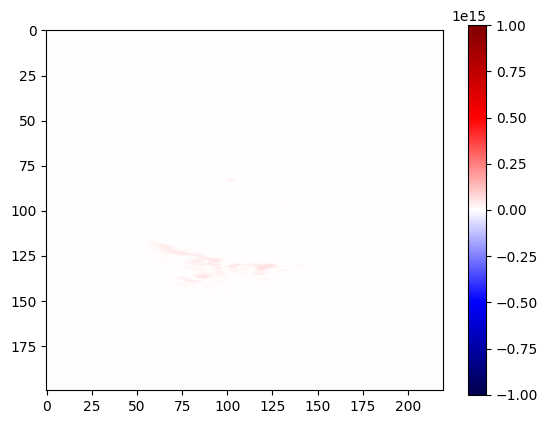

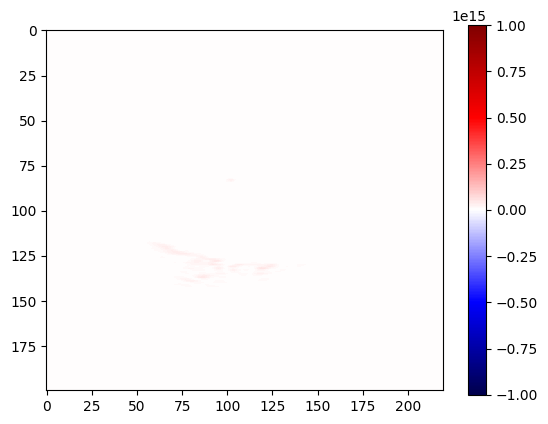

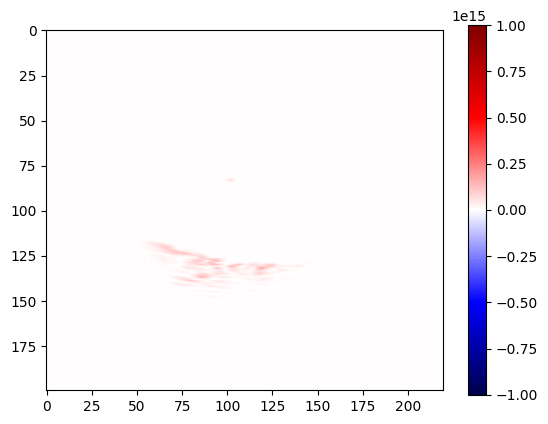

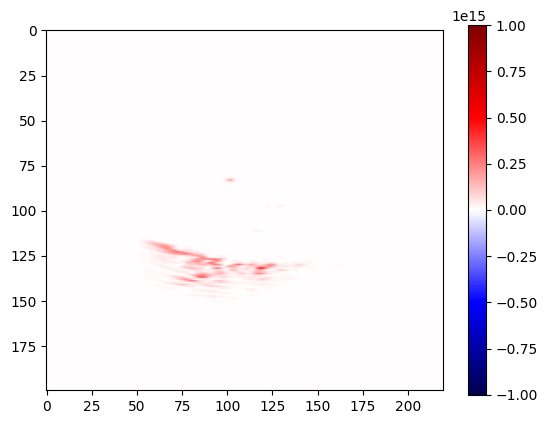

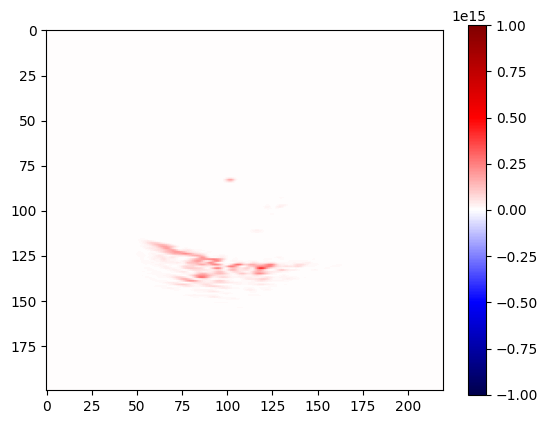

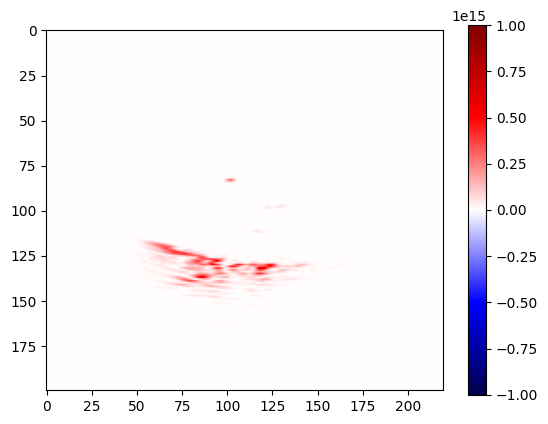

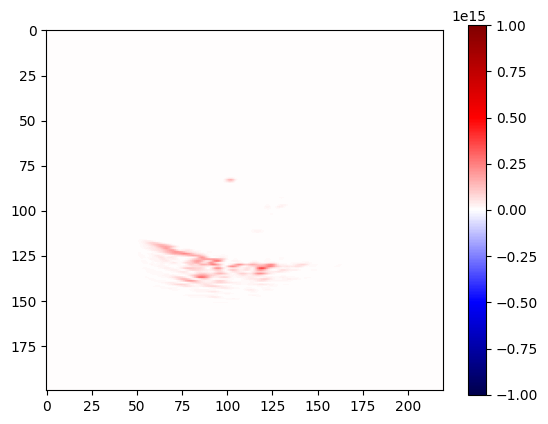

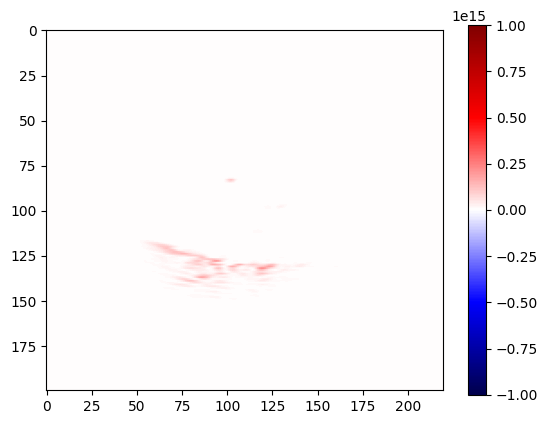

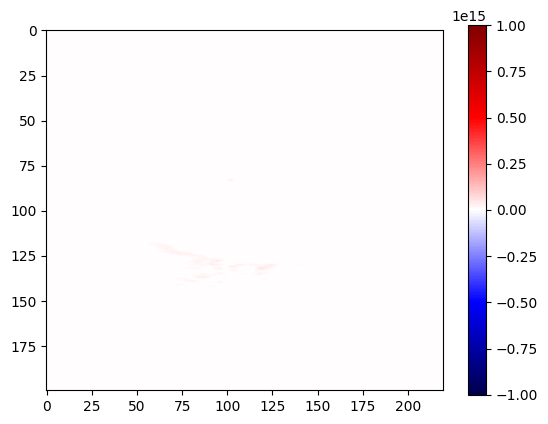

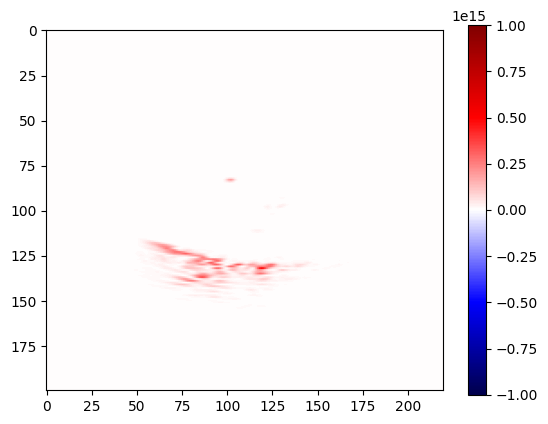

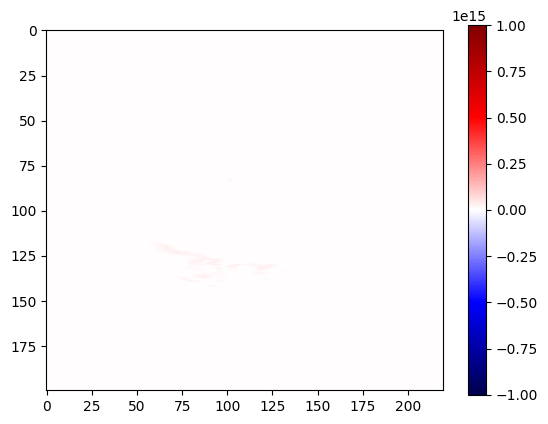

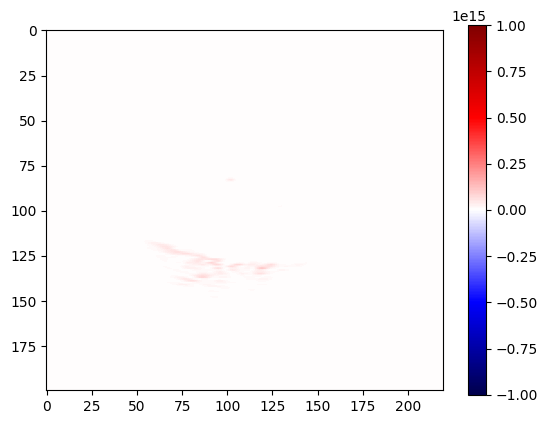

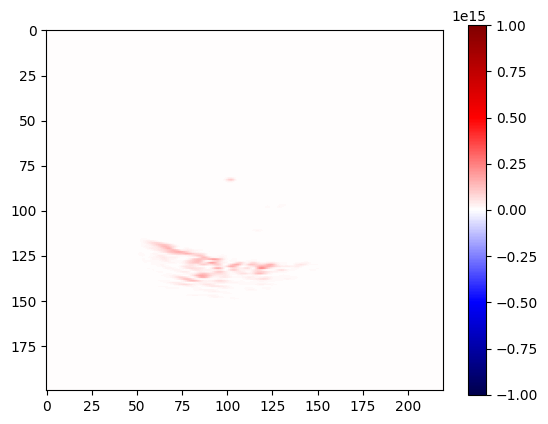

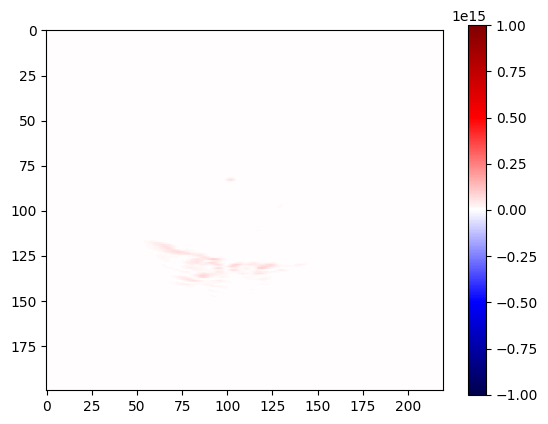

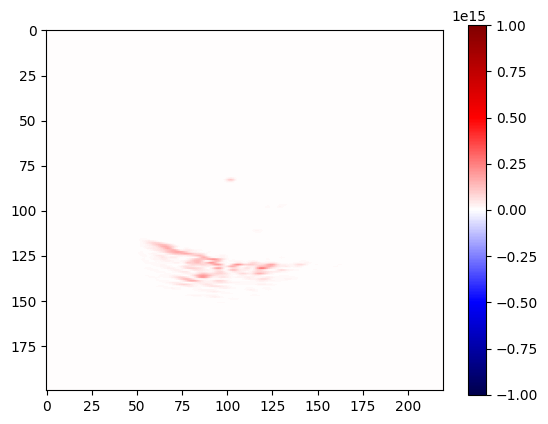

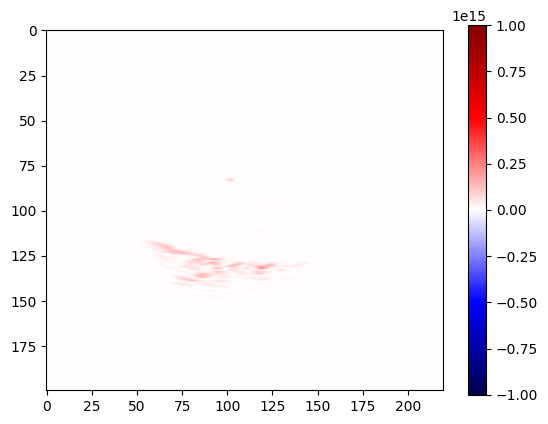

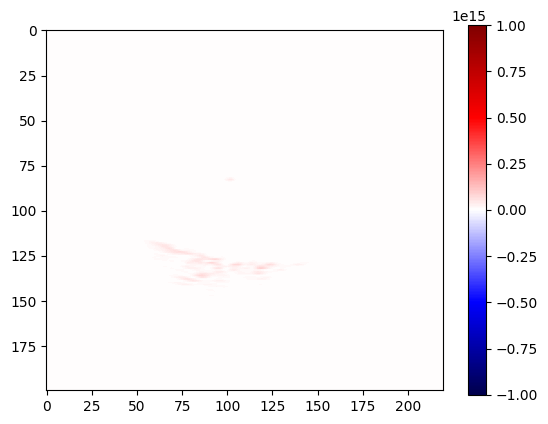

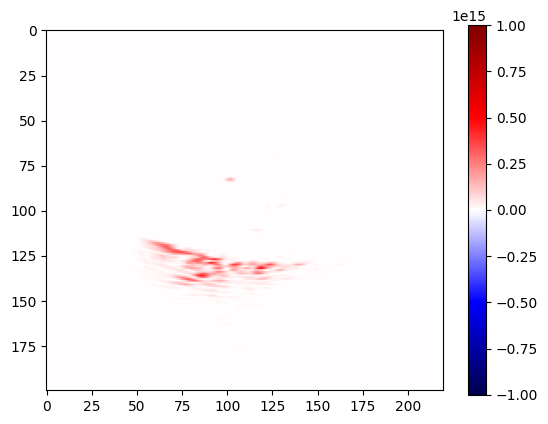

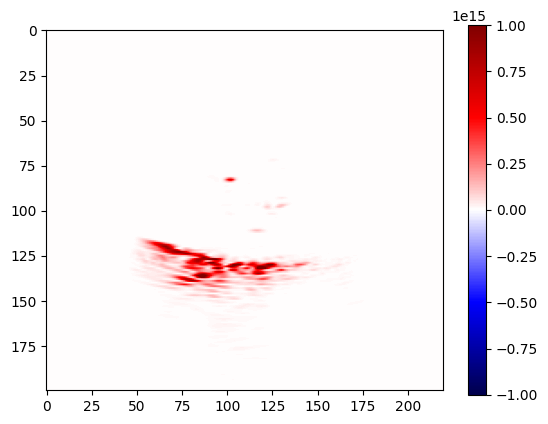

In [340]:
for t in range(35):
    power = power_doppler_2(all_beamformed_doppler_signals_2, 660*t, 660*(t+1), 3300)
    plt.imshow(power[:,:], cmap="seismic", vmin=-1e15, vmax=1e15)
    plt.colorbar()
    plt.show()